In [1]:
from lo_tools import plotting_functions as lo_plot
from datetime import timedelta
import datetime
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [3]:
def get_his_fn_from_dt(dt):

    path = Path("/data1/parker/LO_roms")
    # This creates the Path of a history file from its datetime
    if dt.hour == 0:
        # perfect restart does not write the 0001 file
        dt = dt - timedelta(days=1)
        his_num = '0025'
    else:
        his_num = ('0000' + str(dt.hour + 1))[-4:]
    date_string = dt.strftime('%Y.%m.%d')
    fn = path / 'cas6_v0_live' / ('f' + date_string) / ('ocean_his_' + his_num + '.nc')
    return fn

In [4]:
dt = datetime.datetime(2018,1,1)
fn = get_his_fn_from_dt(dt)

In [5]:
x = np.arange(192,319)
y = np.repeat(706,len(x))

all = lo_plot.get_sect(fn,'u',x,y) # don't thik this is the one, did not get any z info

all[0]; # x in the centre of the cell
all[1];  # y
all[2]; # distance in km
all[3]; # i think the same again
all[4]; # jsut all zeros, same with 5
all[6]; # 2 and 3 but with 30 in depth
all[7]; # nans, same with 8
all[9]; # lon, but for whaterver reason jsut so many of them
all[10]; # lats, again.. so many


In [6]:
hm = lo_plot.get_zfull(0,fn,'rho')[:,706,192:319] # i think this is it!

In [7]:
lo = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/back_20180309/ariane_positions_quantitative.nc')

In [8]:
# def FluxEW(mydata, section, lonW, lonE, fjgrid, maxdepth, distlabel, ax):
y = 706
xmin = 192
xmax = 319

mydata = lo

time = np.abs(np.max(mydata.init_t)-np.min(mydata.init_t))

dist = lo_plot.get_sect(fn,'u',np.arange(xmin,xmax),np.repeat(y,(xmax-xmin)))[6]
z = np.abs(lo_plot.get_zfull(0,fn,'rho')[:,y,xmin:xmax][::-1])
z = np.delete(z,0,0)

depths = mydata.final_depth[(mydata.final_section==4)]
transports = mydata.final_transp[(mydata.final_section==4)]/time
lons = mydata.final_lon[(mydata.final_section==4)]

In [9]:
data = xr.open_dataset('/data1/parker/LO_roms/cas6_v0_live/f2018.02.10/ocean_his_0003.nc')

In [10]:
z_all = ((1+data.s_w)*(grid.h+data.zeta[0]))

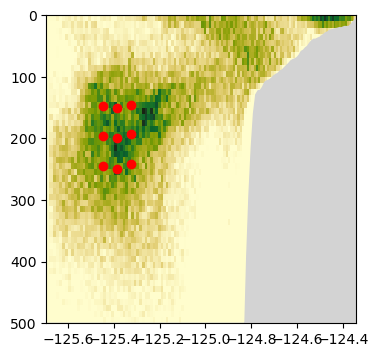

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(grid.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(grid.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, density= True)

ax.set_ylim([500,0])

ax.fill_between(grid.lon_rho[y,xmin-1:xmax+1],grid.h[y,xmin-1:xmax+1], 500, color='lightgray')

#where should we put some parcels to see if they go up the JdF canyon?
ax.scatter(grid.lon_rho[y,210],z_all[5,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[4,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[3,y,210],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[5,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[4,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[3,y,215],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[5,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[4,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[3,y,220],color='r')



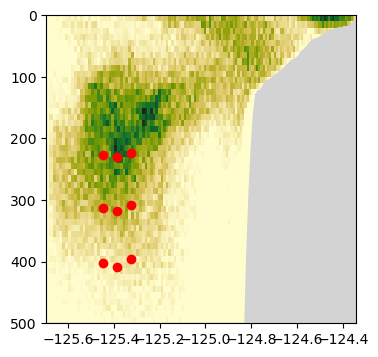

In [12]:
z_all = ((1+data.Cs_w)*(grid.h+data.zeta[0]))
fig, ax = plt.subplots(1,1,figsize=(4,4))

H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(grid.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(grid.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, density= True)

ax.set_ylim([500,0])

ax.fill_between(grid.lon_rho[y,xmin-1:xmax+1],grid.h[y,xmin-1:xmax+1], 500, color='lightgray')

#where should we put some parcels to see if they go up the JdF canyon?
ax.scatter(grid.lon_rho[y,210],z_all[5,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[4,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[3,y,210],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[5,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[4,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[3,y,215],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[5,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[4,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[3,y,220],color='r')

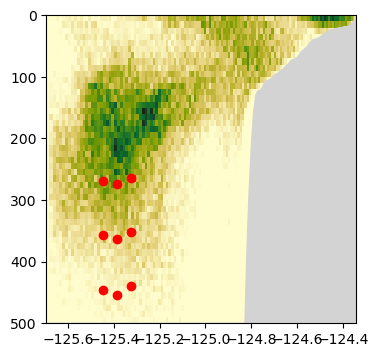

In [13]:

z_all = ((1+data.Cs_r)*(grid.h+data.zeta[0]))
fig, ax = plt.subplots(1,1,figsize=(4,4))

H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(grid.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(grid.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, density= True)

ax.set_ylim([500,0])

ax.fill_between(grid.lon_rho[y,xmin-1:xmax+1],grid.h[y,xmin-1:xmax+1], 500, color='lightgray')

#where should we put some parcels to see if they go up the JdF canyon?
ax.scatter(grid.lon_rho[y,210],z_all[5,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[4,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[3,y,210],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[5,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[4,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[3,y,215],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[5,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[4,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[3,y,220],color='r')


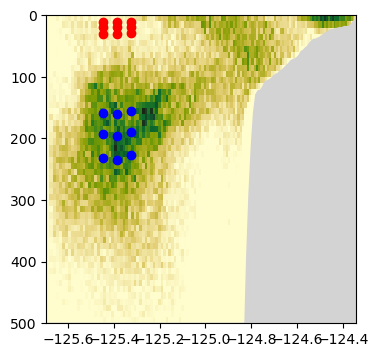

In [14]:

z_all = ((-1*data.Cs_w[::-1])*(grid.h+data.zeta[0]))
fig, ax = plt.subplots(1,1,figsize=(4,4))

H, xedges, yedges, im = ax.hist2d(lons, depths, bins=[np.array(grid.lon_rho[y,xmin-1:xmax+1]), 
                                    np.arange(0,np.max(grid.h[y,xmin:xmax]),10)],weights= transports, 
                                    cmap=cm.cm.speed, density= True)

ax.set_ylim([500,0])

ax.fill_between(grid.lon_rho[y,xmin-1:xmax+1],grid.h[y,xmin-1:xmax+1], 500, color='lightgray')

#where should we put some parcels to see if they go up the JdF canyon?
ax.scatter(grid.lon_rho[y,210],z_all[5,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[4,y,210],color='r')
ax.scatter(grid.lon_rho[y,210],z_all[3,y,210],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[5,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[4,y,215],color='r')
ax.scatter(grid.lon_rho[y,215],z_all[3,y,215],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[5,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[4,y,220],color='r')
ax.scatter(grid.lon_rho[y,220],z_all[3,y,220],color='r')

#where should we ACTUALLY put some parcels to see if they go up the JdF canyon?
ax.scatter(grid.lon_rho[y,210],z_all[13,y,210],color='b')
ax.scatter(grid.lon_rho[y,210],z_all[12,y,210],color='b')
ax.scatter(grid.lon_rho[y,210],z_all[11,y,210],color='b')
ax.scatter(grid.lon_rho[y,215],z_all[13,y,215],color='b')
ax.scatter(grid.lon_rho[y,215],z_all[12,y,215],color='b')
ax.scatter(grid.lon_rho[y,215],z_all[11,y,215],color='b')
ax.scatter(grid.lon_rho[y,220],z_all[13,y,220],color='b')
ax.scatter(grid.lon_rho[y,220],z_all[12,y,220],color='b')
ax.scatter(grid.lon_rho[y,220],z_all[11,y,220],color='b')

In [30]:
# flip:
z_all = ((-1*data.Cs_w[::-1])*(grid.h+data.zeta[0]))
print(z_all[[10,11,12],y,[209,214,219]].values)

[[128.2761307  130.07224552 128.43909972]
 [158.44802846 160.66660841 158.64932952]
 [192.72349634 195.42199938 192.96834283]]


In [31]:
# or no fip:
z_all = (((1+data.Cs_w))*(grid.h+data.zeta[0]))
print(z_all[[10,11,12],y,[209,214,219]].values)
# ok definitely flip!

[[831.15704052 842.7948524  832.21298797]
 [905.77907491 918.46174012 906.92982628]
 [975.25506389 988.9105278  976.49408137]]


In [29]:
run = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/qual_20170802/ariane_trajectories_qualitative.nc')
run.traj_depth[0,:]

<xarray.DataArray 'traj_depth' (ntraj: 27)>
array([131.383049, 161.825214, 196.359677, 133.038711, 163.869695, 198.845825,
       130.286867, 160.46948 , 194.709115, 130.287327, 160.754236, 195.316771,
       131.944898, 162.800581, 197.804731, 129.193403, 159.400711, 193.66836 ,
       130.140899, 160.611115, 195.177401, 131.805581, 162.66441 , 197.67213 ,
       129.051996, 159.262497, 193.533769])
Dimensions without coordinates: ntraj
Attributes:
    title:     What is traj_depth ?
    longname:  Trajectory: z positions
    units:     No dimension